<a href="https://colab.research.google.com/github/salahagnir/CA/blob/main/ML_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [425]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [426]:
df = pd.read_csv('/content/drive/MyDrive/CA2/TII01.20231126154500.csv')
df2 = pd.read_csv('/content/drive/MyDrive/CA2/TOA11.20231218135730.csv')

In [427]:
df

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Week 01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Week 02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Week 03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Week 04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Week 05,Number,912795.0
...,...,...,...,...,...,...,...,...,...,...
790,TII01C01,Passenger Journeys,2023,2023,2,Green line,49,Week 49,Number,NaN
791,TII01C01,Passenger Journeys,2023,2023,2,Green line,50,Week 50,Number,NaN
792,TII01C01,Passenger Journeys,2023,2023,2,Green line,51,Week 51,Number,NaN
793,TII01C01,Passenger Journeys,2023,2023,2,Green line,52,Week 52,Number,NaN


In [428]:
df2

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553
...,...,...,...,...,...,...,...,...
190,TOA11C03,All Luas lines,2022,2022,09,September,Number,3811093
191,TOA11C03,All Luas lines,2022,2022,10,October,Number,4219124
192,TOA11C03,All Luas lines,2022,2022,11,November,Number,4375705
193,TOA11C03,All Luas lines,2022,2022,12,December,Number,4030698


In [429]:
# Creating DataFrames
df1 = pd.DataFrame(df)
df2 = pd.DataFrame(df2)

In [430]:
# Renaming columns in df2 to match columns in df1
df2 = df2.rename(columns={'TLIST(A1)': 'TLIST(W1)', 'C01885V02316': 'C03132V03784', 'Month': 'Weeks of the year'})

# Merging DataFrames based on common columns
df = pd.concat([df1, df2], ignore_index=True)

print(df)

    STATISTIC     Statistic Label  TLIST(W1)  Year C03132V03784  \
0    TII01C01  Passenger Journeys       2019  2019            -   
1    TII01C01  Passenger Journeys       2019  2019            -   
2    TII01C01  Passenger Journeys       2019  2019            -   
3    TII01C01  Passenger Journeys       2019  2019            -   
4    TII01C01  Passenger Journeys       2019  2019            -   
..        ...                 ...        ...   ...          ...   
985  TOA11C03      All Luas lines       2022  2022           09   
986  TOA11C03      All Luas lines       2022  2022           10   
987  TOA11C03      All Luas lines       2022  2022           11   
988  TOA11C03      All Luas lines       2022  2022           12   
989  TOA11C03      All Luas lines       2022  2022            -   

          Luas Line  C01198V01436 Weeks of the year    UNIT       VALUE  
0    All Luas lines           1.0           Week 01  Number    549533.0  
1    All Luas lines           2.0           Wee

In [431]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
STATISTIC             0.000000
Statistic Label       0.000000
TLIST(W1)             0.000000
Year                  0.000000
C03132V03784          0.000000
Luas Line            19.696970
C01198V01436         19.696970
Weeks of the year     0.000000
UNIT                  0.000000
VALUE                 5.151515
dtype: float64


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          990 non-null    object 
 1   Statistic Label    990 non-null    object 
 2   TLIST(W1)          990 non-null    int64  
 3   Year               990 non-null    int64  
 4   C03132V03784       990 non-null    object 
 5   Luas Line          795 non-null    object 
 6   C01198V01436       795 non-null    float64
 7   Weeks of the year  990 non-null    object 
 8   UNIT               990 non-null    object 
 9   VALUE              939 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 77.5+ KB


In [433]:
# Remove rows with any missing values
df.dropna(inplace=True)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 780
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          744 non-null    object 
 1   Statistic Label    744 non-null    object 
 2   TLIST(W1)          744 non-null    int64  
 3   Year               744 non-null    int64  
 4   C03132V03784       744 non-null    object 
 5   Luas Line          744 non-null    object 
 6   C01198V01436       744 non-null    float64
 7   Weeks of the year  744 non-null    object 
 8   UNIT               744 non-null    object 
 9   VALUE              744 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 63.9+ KB


In [435]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [436]:
# Remove rows with any missing values
df.dropna(inplace=True)

In [437]:
# Convert 'Weeks of the year' column to extract numerical week information
df['Numerical_Week'] = df['Weeks of the year'].str.extract('(\d+)').astype(int)

In [438]:
columns_to_drop = ['STATISTIC','Statistic Label','TLIST(W1)','C03132V03784', 'C01198V01436','UNIT','Weeks of the year']

In [439]:
# Drop the columns that are not needed
df = df.drop(columns=columns_to_drop, axis=1)

In [440]:
df.head()

,Year,Luas Line,VALUE,Numerical_Week
0,2019,All Luas lines,549533.0,1
1,2019,All Luas lines,839022.0,2
2,2019,All Luas lines,819359.0,3
3,2019,All Luas lines,860745.0,4
4,2019,All Luas lines,912795.0,5


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 780
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            744 non-null    int64  
 1   Luas Line       744 non-null    object 
 2   VALUE           744 non-null    float64
 3   Numerical_Week  744 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 29.1+ KB


In [442]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Luas Line' column
df['Luas Line Encoded'] = label_encoder.fit_transform(df['Luas Line'])

In [443]:
df

,Year,Luas Line,VALUE,Numerical_Week,Luas Line Encoded
0,2019,All Luas lines,549533.0,1,0
1,2019,All Luas lines,839022.0,2,0
2,2019,All Luas lines,819359.0,3,0
3,2019,All Luas lines,860745.0,4,0
4,2019,All Luas lines,912795.0,5,0
...,...,...,...,...,...
776,2023,Green line,411878.0,35,1
777,2023,Green line,432905.0,36,1
778,2023,Green line,445474.0,37,1
779,2023,Green line,498593.0,38,1


In [444]:
columns_to_drop = ['Luas Line']

In [445]:
# Drop the columns that are not needed
df = df.drop(columns=columns_to_drop, axis=1)

In [446]:
df.head()

,Year,VALUE,Numerical_Week,Luas Line Encoded
0,2019,549533.0,1,0
1,2019,839022.0,2,0
2,2019,819359.0,3,0
3,2019,860745.0,4,0
4,2019,912795.0,5,0


In [447]:
# Feature selection
X = df[['Year', 'Numerical_Week', 'Luas Line Encoded']]
y = df['VALUE']

In [448]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [449]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [450]:
# Choosing the model and defining hyperparameters grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    # Add more hyperparameters as needed for tuning
}

In [451]:
# Initialize the model
rf = RandomForestRegressor()

In [452]:
# Grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error')

In [453]:
# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [454]:
# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 46382.712028780734


In [455]:
from sklearn.model_selection import cross_val_score

In [456]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None)  # Use the best hyperparameters here

In [457]:
# Performing cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [458]:
# Calculating root mean squared error (RMSE) for cross-validation scores
rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE scores

In [459]:
# Print the RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores)

RMSE scores for each fold: [78867.526835   48530.37732483 80716.87494179 38963.81462359
 72993.15840701]


In [460]:
# Print the average RMSE score and its standard deviation
print(f"Average RMSE: {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")

Average RMSE: 64014.3504 (+/- 17014.6580)


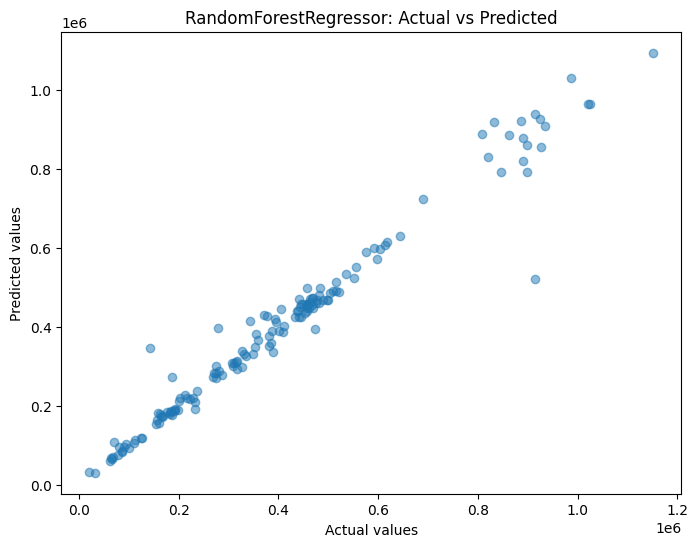

In [461]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual target values from the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('RandomForestRegressor: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [462]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

In [463]:
# Initialize Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor()

In [464]:
# Fit the Gradient Boosting Regressor
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor()

In [465]:
# Predict using Gradient Boosting Regressor
y_pred_gb = gradient_boosting.predict(X_test)

In [466]:
# Calculate RMSE for Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print(f"Gradient Boosting Regressor RMSE: {rmse_gb}")

Gradient Boosting Regressor RMSE: 74603.8070381047


In [467]:
# Performing cross-validation
cv_scores_gb = cross_val_score(gradient_boosting, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [468]:
# Calculating RMSE for cross-validation scores
rmse_scores_gb = np.sqrt(-cv_scores_gb)  # Calculate RMSE scores

In [469]:
# Print the RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores_gb)


RMSE scores for each fold: [69096.36798934 71789.89800771 91273.509911   54695.56087431
 81478.87393646]


In [470]:
# Print the average RMSE score and its standard deviation
print(f"Average RMSE: {np.mean(rmse_scores_gb):.4f} (+/- {np.std(rmse_scores_gb):.4f})")

Average RMSE: 73666.8421 (+/- 12291.0069)


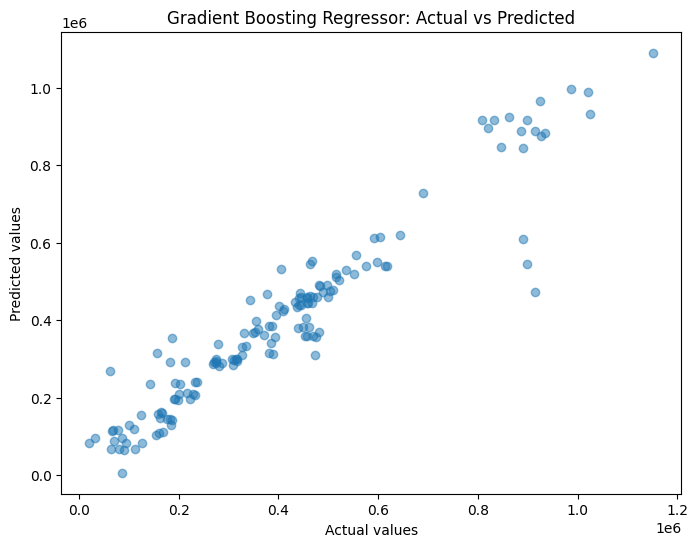

In [471]:
# Visualize Gradient Boosting Regressor predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [472]:
# Initialize Support Vector Regressor (SVR)
svr = SVR()

In [473]:
# Fit the SVR
svr.fit(X_train, y_train)

# Predict using SVR
y_pred_svr = svr.predict(X_test)

In [474]:
# Calculate RMSE for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print(f"Support Vector Regressor RMSE: {rmse_svr}")

Support Vector Regressor RMSE: 248263.6239936689


In [475]:
# Performing cross-validation
cv_scores_svr = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [476]:
# Calculating RMSE for cross-validation scores
rmse_scores_svr = np.sqrt(-cv_scores_svr)  # Calculate RMSE scores


In [477]:
# Print the RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores_svr)


RMSE scores for each fold: [263727.42627139 251827.76757745 311810.98516958 241473.73043513
 271924.95672081]


In [478]:
# Print the average RMSE score and its standard deviation
print(f"Average RMSE: {np.mean(rmse_scores_svr):.4f} (+/- {np.std(rmse_scores_svr):.4f})")

Average RMSE: 268152.9732 (+/- 24158.3512)


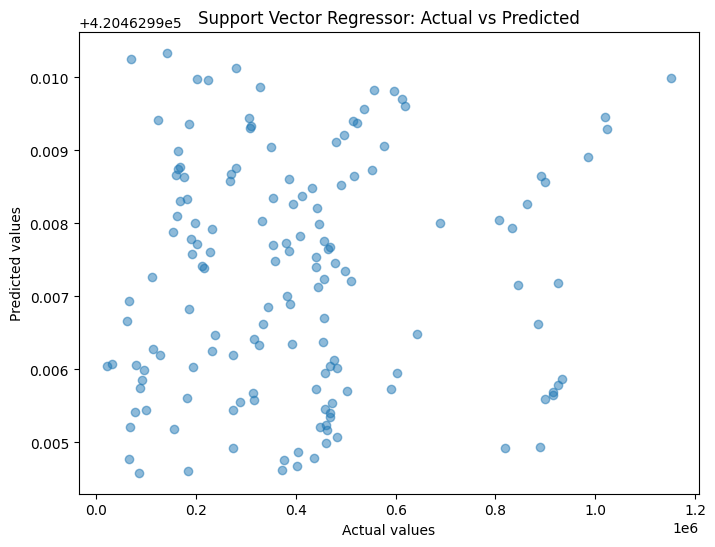

In [479]:
# Visualize SVR predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('Support Vector Regressor: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [480]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [481]:
# Assuming best_model is the trained RandomForestRegressor model
# Training and evaluation are already performed on X_train, y_train, X_test, y_test

# Initialize Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

In [482]:
# Initialize Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)

In [483]:
# RandomForestRegressor predictions (already trained)
y_pred_rf = best_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [484]:
# Create a bar plot
models = ['RandomForestRegressor', 'GradientBoostingRegressor', 'SupportVectorRegressor']
rmse_values = [rmse_rf, rmse_gb, rmse_svr]

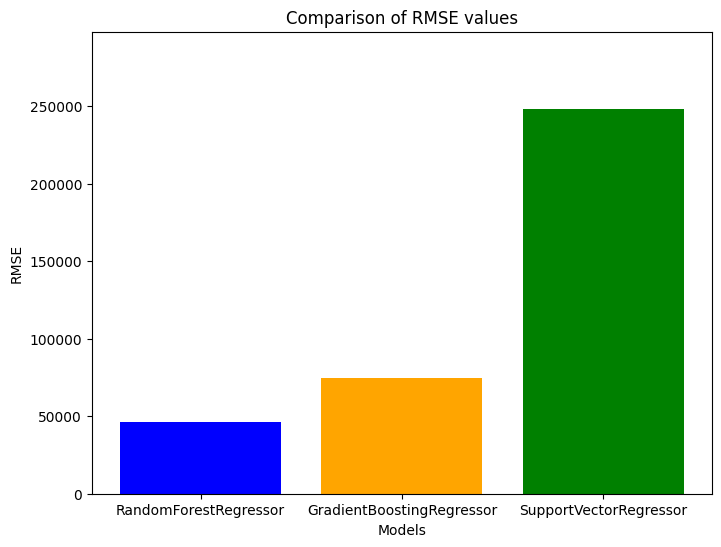

In [485]:
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.title('Comparison of RMSE values')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.2)  # Set ylim for better visualization
plt.show()

In [486]:
#warnings
import warnings
warnings.filterwarnings('ignore')

import os
#dir_Path ='F:\\'
#os.chdir(dir_Path)

In [487]:
pip install praw

In [488]:
import praw

# Reddit API credentials (you need to create an app in Reddit to obtain these)
client_id = 'grPUEiWuAjhA3Et8c6Pn_Q'
client_secret = '62H9rNmzcWVjann8ZH3BCz2xYf-9mQ'
user_agent = 'CASalah'

# Initialize PRAW with your credentials
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

# URL of the Reddit post
post_url = 'https://www.reddit.com/r/Dublin/comments/12mbt0g/another_day_on_the_red_line_luas/'

# Fetch Reddit post data
try:
    submission = reddit.submission(url=post_url)

    # Print post title and content
    print(f"Post Title: {submission.title}\n")
    print(f"Post Content: {submission.selftext}\n")

    # Print comments
    print("Comments:")
    submission.comments.replace_more(limit=None)  # Retrieve all comments
    for comment in submission.comments.list():
        print(f"- {comment.body}\n")
except Exception as e:
    print(f"Error fetching Reddit post: {e}")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Post Title: Another day on the Red Line LUAS…

Post Content: This evening, as the tram was leaving Jervis, a guy was harassing another passenger who was seated behind him. The man got right up to the other passenger's ear and threatened him, saying, "D’ye wanna get shanked in the neck?" He was showboating to some boys in the seats next to him, who were lapping it up. I reported the incident by texting the anti-social behaviour line (51444).

Later, when the harassed passenger got off and was replaced by another passenger, the man flicked his ear and verbally abused him, making further threats. He then showed off a blade to the boys. I got off the tram and called the guards with the details.

Meanwhile, I noticed a woman across the tracks who was also being harassed by a man. She asked me for help, claiming that she didn't know him. I asked if everything was alright - he told me to "f*** off away," saying it was “between him and his woman”. They kept fighting and the woman spoke to him 

In [489]:
import praw
from textblob import TextBlob
import pandas as pd

# Reddit API credentials
client_id = 'grPUEiWuAjhA3Et8c6Pn_Q'
client_secret = '62H9rNmzcWVjann8ZH3BCz2xYf-9mQ'
user_agent = 'CASalah'

# Initialize PRAW with your credentials
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent,
)

# URL of the Reddit post
post_url = 'https://www.reddit.com/r/Dublin/comments/12mbt0g/another_day_on_the_red_line_luas/'

# Create empty lists to store data
comments_list = []
sentiment_polarity = []
sentiment_subjectivity = []

# Fetch Reddit post data
try:
    submission = reddit.submission(url=post_url)

    # Perform sentiment analysis on post content
    post_blob = TextBlob(submission.selftext)
    post_sentiment = post_blob.sentiment
    print(f"Post Title: {submission.title}")
    print(f"Post Sentiment - Polarity: {post_sentiment.polarity}, Subjectivity: {post_sentiment.subjectivity}\n")

    # Append post sentiment to lists
    comments_list.append("Post")
    sentiment_polarity.append(post_sentiment.polarity)
    sentiment_subjectivity.append(post_sentiment.subjectivity)

    # Fetch comments and perform sentiment analysis
    submission.comments.replace_more(limit=None)  # Retrieve all comments
    for comment in submission.comments.list():
        comment_blob = TextBlob(comment.body)
        comment_sentiment = comment_blob.sentiment

        # Append comment sentiment to lists
        comments_list.append(comment.body)
        sentiment_polarity.append(comment_sentiment.polarity)
        sentiment_subjectivity.append(comment_sentiment.subjectivity)

except Exception as e:
    print(f"Error fetching Reddit post: {e}")

# Create a pandas DataFrame with sentiment analysis results
data = {
    'Text': comments_list,
    'Polarity': sentiment_polarity,
    'Subjectivity': sentiment_subjectivity
}

df = pd.DataFrame(data)

# Display sentiment analysis results in tabular format
print(df)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Post Title: Another day on the Red Line LUAS…
Post Sentiment - Polarity: 0.008523119392684613, Subjectivity: 0.4718599033816425

                                                 Text  Polarity  Subjectivity
0                                                Post  0.008523      0.471860
1   I think it's gotten bad especially in the past... -0.069167      0.387870
2   Red line is disgusting. Moved back to Dublin f... -0.060000      0.426667
3   **Update:** I received a call from An Garda Sí...  0.168750      0.287500
4   Not as bad obviously, but another thing I'm no... -0.093333      0.286667
5   Last time I was on the green line a woman spat... -0.075000      0.416667
6   The amount of anti social behaviour and just s... -0.075152      0.524697
7   Me and my friends had a glass bottle thrown at...  0.000000      0.000000
8   So kind of transport police would be ideal for...  0.750000      0.950000
9   Of all the public transport companies operatin... -0.033333      0.288889
10  I witness

The sentiment analysis findings for the Reddit post and comments are arranged neatly in a table. Each row in the table represents either the post or a comment. It shows the text, polarity score, and subjectivity score. The polarity score tells us how positive or negative the sentiment is, ranging from -1 (very negative) to 1 (very positive). Meanwhile, the subjectivity score indicates how much opinions or feelings are present in the text, from 0 (factual) to 1 (opinionated).

Data Cleaning/EDA

In [490]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Text            0.0
Polarity        0.0
Subjectivity    0.0
dtype: float64


Percentage for default

 0.000000    23.08
 0.500000     3.85
-0.075000     3.85
 0.700000     3.85
 0.008523     1.92
 0.285124     1.92
-0.500000     1.92
-0.133333     1.92
 0.049956     1.92
-0.012500     1.92
 0.050000     1.92
 0.212500     1.92
-0.025000     1.92
 0.159286     1.92
-0.133333     1.92
-0.179167     1.92
 0.019048     1.92
 0.150000     1.92
-0.006111     1.92
-0.200000     1.92
 0.100000     1.92
-0.250000     1.92
-0.020238     1.92
-0.060000     1.92
 0.168750     1.92
-0.093333     1.92
-0.075152     1.92
 0.750000     1.92
-0.033333     1.92
-0.137500     1.92
-0.069167     1.92
-0.077500     1.92
 0.400000     1.92
-0.177778     1.92
 0.103175     1.92
 0.049074     1.92
 0.250000     1.92
 0.070833     1.92
Name: Polarity, dtype: float64


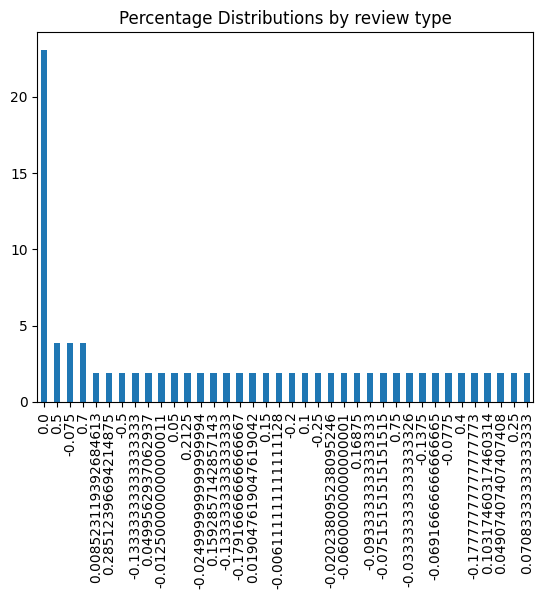

In [491]:
from ast import increment_lineno
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df.Polarity.value_counts(normalize=True)*100,2))
round(df.Polarity.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()



In [492]:
#df.drop(columns = ['Subjectivity'], inplace = True)

In [493]:
#Apply first level cleaning
import re
import string

#This function conver to lower-case, removes square brackets, romoves numbers and punctiuation
def text_clean_1(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\wd\w*', '', text)
  return text

cleaned1 = lambda x: text_clean_1(x)

In [494]:
#
df['Polarity']= pd.DataFrame(df.Text.apply(cleaned1))
df.head(10)

,Text,Polarity,Subjectivity
0,Post,post,0.471860
1,I think it's gotten bad especially in the past...,i think its gotten b especially in the past fe...,0.387870
2,Red line is disgusting. Moved back to Dublin f...,r line is disgusting mov back to dublin from a...,0.426667
3,**Update:** I received a call from An Garda Sí...,u i receiv a call from an ga síochána telling ...,0.287500
4,"Not as bad obviously, but another thing I'm no...",not as b obviously but another thing im notici...,0.286667
5,Last time I was on the green line a woman spat...,last time i was on the green line a woman spat...,0.416667
6,The amount of anti social behaviour and just s...,the amount of anti social behaviour a just she...,0.524697
7,Me and my friends had a glass bottle thrown at...,me a my frie h a glass bottle thrown at us at ...,0.000000
8,So kind of transport police would be ideal for...,so ki of transport police wou be for types of...,0.950000
9,Of all the public transport companies operatin...,of all the public transport companies operatin...,0.288889


In [495]:
def text_clean_2(text):
  text = re.sub('[""...]', '', text)
  text = re.sub('\n', '', text)
  return text

cleaned2 = lambda x: text_clean_2(x)

In [496]:
import re

def text_clean_2(text):
    text = re.sub('["“”...]', '', text)  # Remove quotes, ellipses, and other specified characters
    text = re.sub('\n', '', text)       # Remove newline characters
    return text

cleaned2 = lambda x: text_clean_2(x)

In [497]:
df['new'] = pd.DataFrame(df['Polarity'].apply(cleaned2))
df.head(10)

,Text,Polarity,Subjectivity,new
0,Post,post,0.471860,post
1,I think it's gotten bad especially in the past...,i think its gotten b especially in the past fe...,0.387870,i think its gotten b especially in the past fe...
2,Red line is disgusting. Moved back to Dublin f...,r line is disgusting mov back to dublin from a...,0.426667,r line is disgusting mov back to dublin from a...
3,**Update:** I received a call from An Garda Sí...,u i receiv a call from an ga síochána telling ...,0.287500,u i receiv a call from an ga síochána telling ...
4,"Not as bad obviously, but another thing I'm no...",not as b obviously but another thing im notici...,0.286667,not as b obviously but another thing im notici...
5,Last time I was on the green line a woman spat...,last time i was on the green line a woman spat...,0.416667,last time i was on the green line a woman spat...
6,The amount of anti social behaviour and just s...,the amount of anti social behaviour a just she...,0.524697,the amount of anti social behaviour a just she...
7,Me and my friends had a glass bottle thrown at...,me a my frie h a glass bottle thrown at us at ...,0.000000,me a my frie h a glass bottle thrown at us at ...
8,So kind of transport police would be ideal for...,so ki of transport police wou be for types of...,0.950000,so ki of transport police wou be for types of...
9,Of all the public transport companies operatin...,of all the public transport companies operatin...,0.288889,of all the public transport companies operatin...


Model training

In [498]:
from sklearn.model_selection import train_test_split
ndependent_var = df.new
Dependent_var = df.Text

IV_train, IV_test, DV_train, DV_test = train_test_split(ndependent_var,Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test :', len(DV_test))

IV_train : 46
IV_test : 6
DV_train : 46
DV_test : 6


In [499]:
from sklearn.model_selection import train_test_split

# Assuming 'new' is the independent variable and 'Text' is the dependent variable
independent_var = df['new']
dependent_var = df['Text']

IV_train, IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size=0.1, random_state=225)

print('IV_train:', len(IV_train))
print('IV_test:', len(IV_test))
print('DV_train:', len(DV_train))
print('DV_test:', len(DV_test))

IV_train: 46
IV_test: 6
DV_train: 46
DV_test: 6


In [500]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline


In [501]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Creating a pipeline with TfidfVectorizer and LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Using TfidfVectorizer for feature extraction
    ('clf', LogisticRegression(solver='lbfgs'))  # Logistic Regression classifier
])

In [502]:
model = Pipeline([('vectorizer' , tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Model prediction

In [503]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy :", accuracy_score(predictions, DV_test))
print("Precision :", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall :", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy : 0.0
Precision : 0.0
Recall : 0.0


Tring on new reviews

In [504]:
example = ["Im satisfied"]
result = model.predict(example)

print(result)

['[deleted]']
